In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [4]:
data1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [5]:

data1 = data1[data1['target'] != 0][['sepal width (cm)','petal length (cm)','target']]

In [6]:
data1.head()

,sepal width (cm),petal length (cm),target
50,3.2,4.7,1.0
51,3.2,4.5,1.0
52,3.1,4.9,1.0
53,2.3,4.0,1.0
54,2.8,4.6,1.0


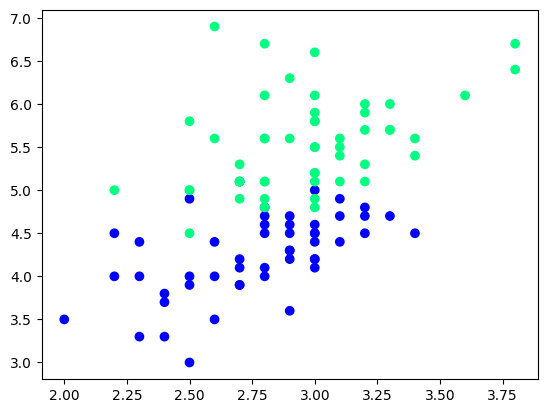

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.scatter(data1['sepal width (cm)'],data1['petal length (cm)'],c=data1['target'],cmap='winter')

In [9]:
# Taking only 10 rows for training
data1 = data1.sample(100)
df_train = data1.iloc[:60,:].sample(10)
df_val = data1.iloc[60:80,:].sample(5)
df_test = data1.iloc[80:,:].sample(5)

In [10]:

X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [14]:

def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

# Case-1 Bagging

In [11]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,sepal width (cm),petal length (cm),target
56,3.3,4.7,1.0
55,2.8,4.5,1.0
118,2.6,6.9,2.0
148,3.4,5.4,2.0
118,2.6,6.9,2.0
55,2.8,4.5,1.0
74,2.9,4.3,1.0
104,3.0,5.8,2.0


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [13]:
dt_bag1 = DecisionTreeClassifier()

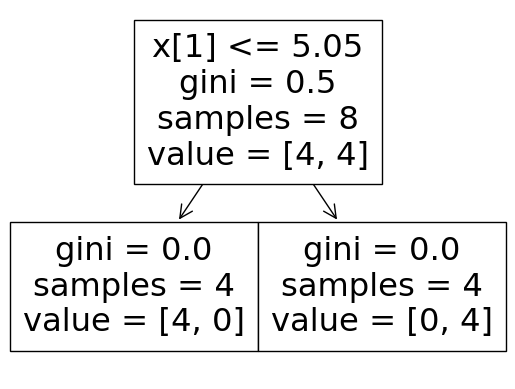

E:\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.6


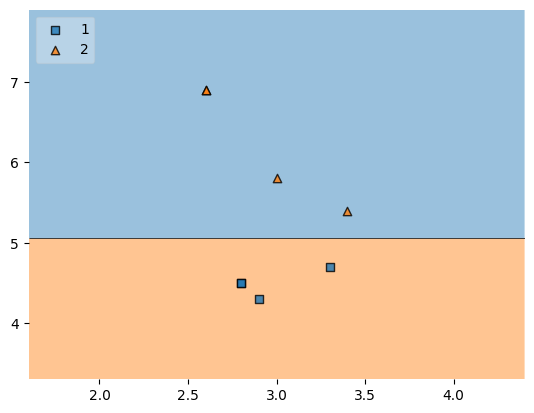

In [21]:
evaluate(dt_bag1,X,y.astype(np.int_))

In [22]:
# Data for Tree 2
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal width (cm),petal length (cm),target
53,2.3,4.0,1.0
53,2.3,4.0,1.0
55,2.8,4.5,1.0
104,3.0,5.8,2.0
74,2.9,4.3,1.0
148,3.4,5.4,2.0
53,2.3,4.0,1.0
121,2.8,4.9,2.0


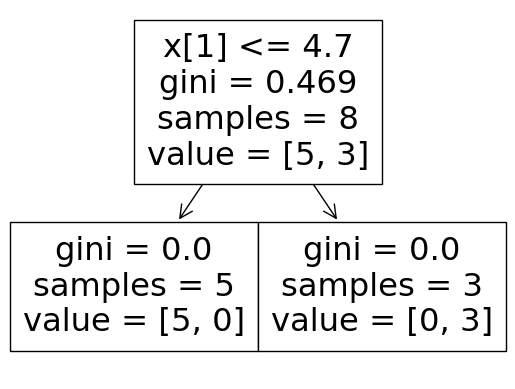

E:\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


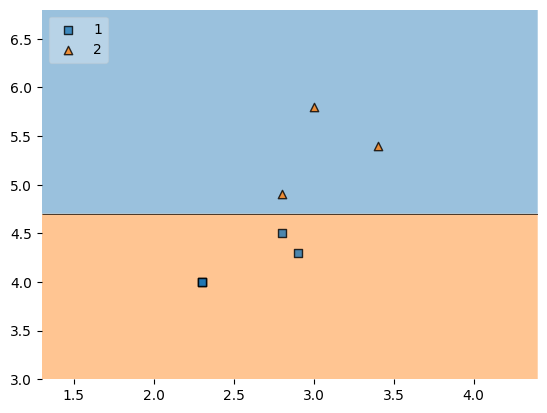

In [24]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y.astype(np.int_))

In [25]:
# Data for Tree 3
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal width (cm),petal length (cm),target
118,2.6,6.9,2.0
148,3.4,5.4,2.0
65,3.1,4.4,1.0
53,2.3,4.0,1.0
148,3.4,5.4,2.0
121,2.8,4.9,2.0
56,3.3,4.7,1.0
56,3.3,4.7,1.0


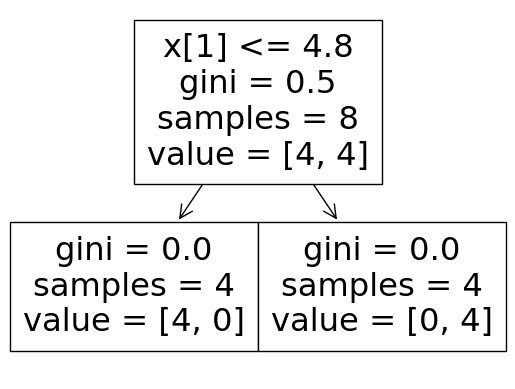

E:\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


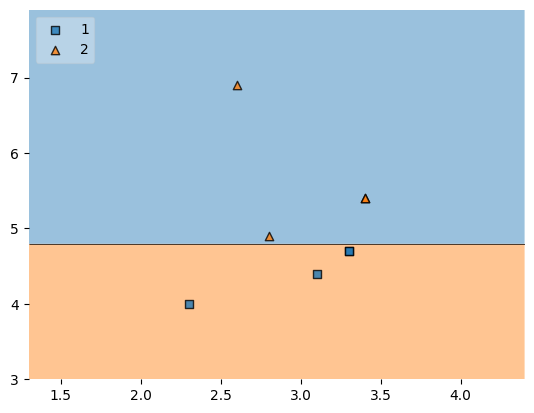

In [26]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y.astype(np.int_))

# Predict

In [31]:
df_test

,sepal width (cm),petal length (cm),target
81,2.4,3.7,1.0
69,2.5,3.9,1.0
133,2.8,5.1,2.0
120,3.2,5.7,2.0
72,2.5,4.9,1.0


In [32]:
print("Predictor 1",dt_bag1.predict(np.array([3.2,5.7]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([3.2,5.7]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([3.2,5.7]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [2]
Predictor 3 [2]


E:\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Pasting

In [33]:
# Row sampling without replacement
df_train

,sepal width (cm),petal length (cm),target
89,2.5,4.0,1.0
65,3.1,4.4,1.0
118,2.6,6.9,2.0
74,2.9,4.3,1.0
104,3.0,5.8,2.0
53,2.3,4.0,1.0
56,3.3,4.7,1.0
148,3.4,5.4,2.0
121,2.8,4.9,2.0
55,2.8,4.5,1.0


In [34]:
df_train.sample(8)

,sepal width (cm),petal length (cm),target
89,2.5,4.0,1.0
104,3.0,5.8,2.0
121,2.8,4.9,2.0
65,3.1,4.4,1.0
118,2.6,6.9,2.0
56,3.3,4.7,1.0
74,2.9,4.3,1.0
53,2.3,4.0,1.0


# Random Subspace

In [36]:
data1.sample(2,replace=True,axis=1)

,target,petal length (cm)
63,1.0,4.7
90,1.0,4.4
106,2.0,4.5
84,1.0,4.5
53,1.0,4.0
...,...,...
62,1.0,4.0
61,1.0,4.2
117,2.0,6.7
71,1.0,4.0
